In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


In [8]:
# Load the dataset
import kagglehub

# Download latest version of the dataset
path = kagglehub.dataset_download("uciml/breast-cancer-wisconsin-data")

print("Path to dataset files:", path)
import pandas as pd

# Load the dataset from the downloaded path
data = pd.read_csv(path + "/data.csv")  # Adjust the filename as necessary
print(data.head())



Path to dataset files: /root/.cache/kagglehub/datasets/uciml/breast-cancer-wisconsin-data/versions/2
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280   

In [9]:
# Drop irrelevant columns (if any) and encode the label
data = data.drop(['Unnamed: 32', 'id'], axis=1)
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})  # Malignant: 1, Benign: 0

# Split features and target
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [10]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

# Predictions
y_pred = log_reg.predict(X_test_scaled)


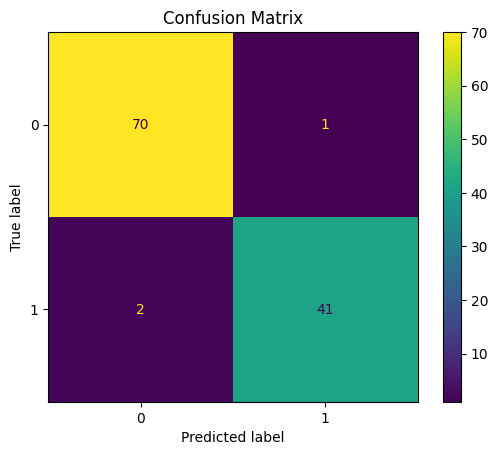

In [11]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()


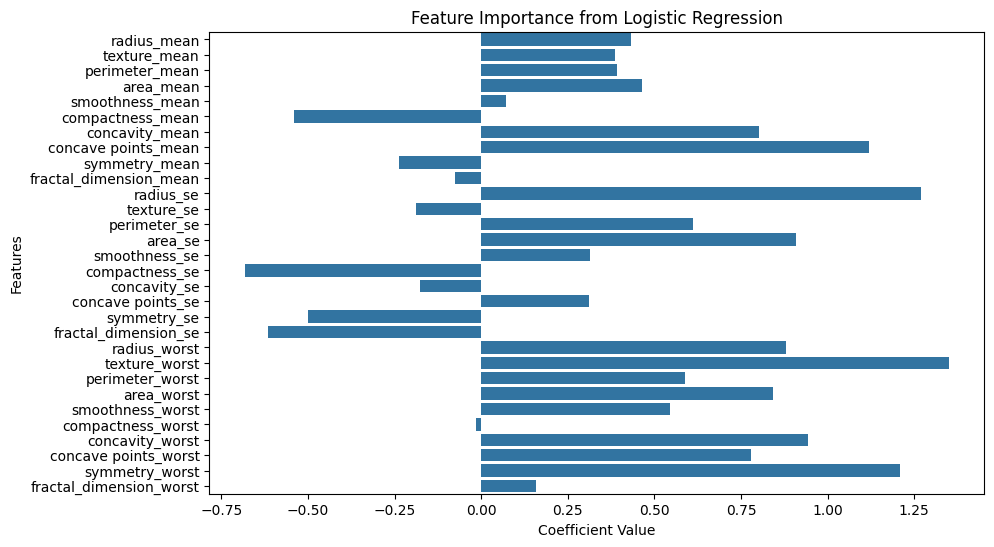

In [12]:
# Feature importance
importance = log_reg.coef_[0]
features = X.columns

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=importance, y=features)
plt.title('Feature Importance from Logistic Regression')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.show()


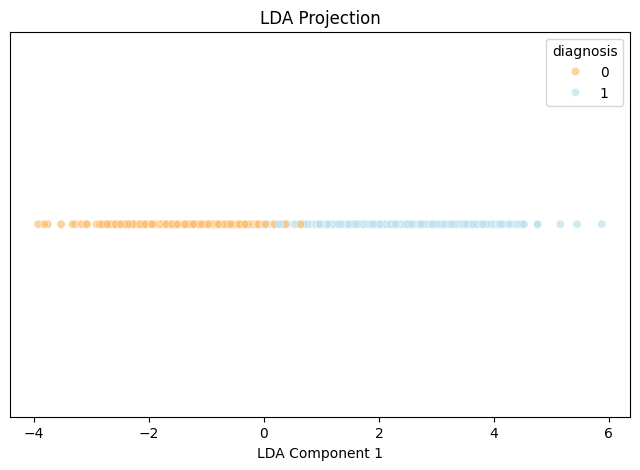

In [13]:
# LDA
lda = LDA(n_components=1)
X_lda = lda.fit_transform(X, y)

# Plot LDA results
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_lda[:, 0], y=np.zeros_like(X_lda[:, 0]), hue=y, palette='RdYlBu', alpha=0.7)
plt.title('LDA Projection')
plt.xlabel('LDA Component 1')
plt.yticks([])
plt.show()
